Combined data saved to C:\Users\User\Documents\Lie detect data\PolyData\poly_lie_14.pkl
Combined data saved to C:\Users\User\Documents\Lie detect data\PolyData\poly_lie_11.pkl
Combined data saved to C:\Users\User\Documents\Lie detect data\PolyData\poly_lie_3.pkl
Combined data saved to C:\Users\User\Documents\Lie detect data\PolyData\poly_lie_16.pkl
Combined data saved to C:\Users\User\Documents\Lie detect data\PolyData\poly_lie_31.pkl
Combined data saved to C:\Users\User\Documents\Lie detect data\PolyData\poly_lie_15.pkl
Combined data saved to C:\Users\User\Documents\Lie detect data\PolyData\poly_lie_26.pkl
Combined data saved to C:\Users\User\Documents\Lie detect data\PolyData\poly_lie_18.pkl
Combined data saved to C:\Users\User\Documents\Lie detect data\PolyData\poly_lie_34.pkl
Combined data saved to C:\Users\User\Documents\Lie detect data\PolyData\poly_lie_24.pkl
Combined data saved to C:\Users\User\Documents\Lie detect data\PolyData\poly_lie_25.pkl
Combined data saved to C:\Users\U

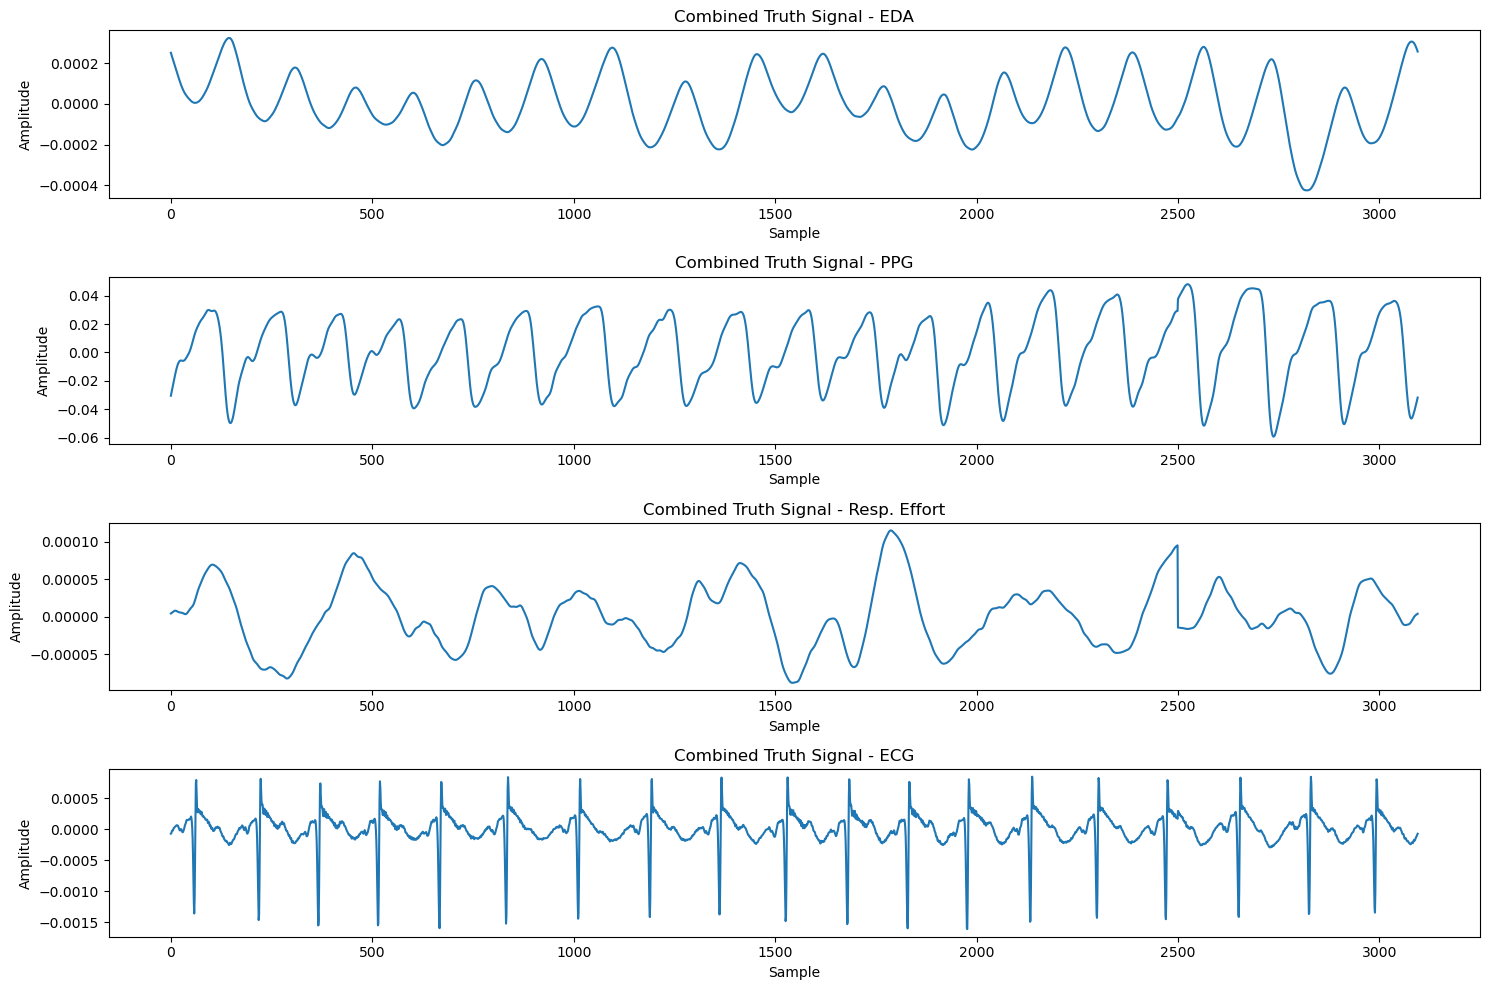

In [5]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Define the directory containing the files
directory = r'C:\Users\User\Documents\Lie detect data\PolyData'

# Function to combine session files into continuous signals
def combine_sessions_continuous(session_type, index):
    answer_file = os.path.join(directory, f'poly_ansr_{session_type}_{index}.pkl')
    question_file = os.path.join(directory, f'poly_quer_{session_type}_{index}.pkl')
    combined_file = os.path.join(directory, f'poly_{session_type}_{index}.pkl')
    
    # Load the data
    data_answer = pd.read_pickle(answer_file)
    data_question = pd.read_pickle(question_file)
    
    # Combine the data
    combined_data = np.concatenate((data_answer, data_question), axis=1)
    
    # Save the combined data
    pd.to_pickle(combined_data, combined_file)
    print(f'Combined data saved to {combined_file}')
    
    return combined_data

# Get list of all files in the directory
files = os.listdir(directory)

# Use regex to find all unique session indices for "lie" and "truth"
lie_indices = set()
truth_indices = set()
lie_pattern = re.compile(r'poly_ansr_lie_(\d+)\.pkl')
truth_pattern = re.compile(r'poly_ansr_truth_(\d+)\.pkl')

for file in files:
    lie_match = lie_pattern.match(file)
    truth_match = truth_pattern.match(file)
    if lie_match:
        lie_indices.add(lie_match.group(1))
    if truth_match:
        truth_indices.add(truth_match.group(1))

# Combine lie session files
for index in lie_indices:
    combine_sessions_continuous('lie', index)

# Combine truth session files
for index in truth_indices:
    combined_data = combine_sessions_continuous('truth', index)

# Define signal names
signal_names = ['EDA', 'PPG', 'Resp. Effort', 'ECG']

# Plot the combined signals for the truth data (last combined for demonstration)
plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(combined_data[i])
    plt.title(f'Combined Truth Signal - {signal_names[i]}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

